In [1]:
from top2vec import Top2Vec
import glob

In [7]:
data = []
for f in glob.glob('zeit/xtract/article_*.txt'):
    with open(f, "r") as file:
        text = file.read()
        text = text.replace('\n', ' ')
        data.append(text)

In [9]:
model = Top2Vec(documents=data, speed="learn", workers=8)

2022-02-08 19:46:58,802 - top2vec - INFO - Pre-processing documents for training
2022-02-08 19:47:04,384 - top2vec - INFO - Creating joint document/word embedding
2022-02-08 19:50:27,898 - top2vec - INFO - Creating lower dimension embedding of documents
2022-02-08 19:50:40,532 - top2vec - INFO - Finding dense areas of documents
2022-02-08 19:50:40,587 - top2vec - INFO - Finding topics


In [10]:
model.get_num_topics()

25

In [11]:
topic_words, word_scores, topic_nums = model.get_topics(24)

In [12]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [13]:
len(topic_words)

24

In [14]:
list(map(lambda x: 'corona' in x, topic_words))

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [15]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=5)
documents

array(['[Übersicht Wissen]  [nächster Artikel]  DER ZWEIFEL  Wenn uns die Pandemie etwas gelehrt hat, dann dies: Noch ein Test geht immer. Das Coronavirus soll nicht unentdeckt unter uns wandeln dürfen. So helfen PCR-, Lolli-, Spuck- oder Schnelltest dabei, die Ausbreitung von Sars-CoV-2 einzudämmen. Doch mittlerweile sind 39 Prozent der Bevölkerung vollständig geimpft. Die Geimpften müssen sich kaum noch testen lassen, und vielerorts schließen sogar Testzentren. Nun empfiehlt der Verband der Diagnostika-Industrie Antikörpertests für Geimpfte, also den Nachweis, ob die Spritze wirklich schützende Antikörper produziert hat. Manche Ärzte propagieren diese individuelle Erfolgskontrolle, Websites preisen den Service an – zum Preis von 25 Euro. Doch ist das wirklich nützlich?  Christian Bogdan ist Mitglied der Ständigen Impfkommission. Er reagiert auf Nachfrage der ZEIT sehr eindeutig: »Eine routinemäßige Überprüfung der durch eine vollständige Immunisierung ausgelösten Immunantwort ist abs

In [11]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=5)
documents

array(['[Übersicht Politik]  [nächster Artikel]  [article image]  Hinter den Nachrichten  VON LEA FREHSE  Einen »Jahrhundert-Deal« hatte Donald Trump versprochen, und tatsächlich hat der Präsident in gewissem Sinne etwas Epochales produziert. Der Vorschlag zur Beilegung des Nahostkonflikts, den der US-Präsident gemeinsam mit Israels Premierminister Benjamin Netanjahu am Dienstag in Washington präsentierte, bricht nämlich mit der westlichen Nahostpolitik der vergangenen Jahrzehnte.  Israel würden demnach sowohl sämtliche völkerrechtswidrig gebauten Siedlungen als auch das strategisch wichtige Jordantal an der Grenze zu Jordanien zugeschlagen. Die Palästinenser sollen sich künftig auf dem verbliebenen Gebiet selbst verwalten – dem Vernehmen nach jedoch, ohne Kontrolle über die eigenen Grenzen zu haben. Trump sprach in Washington von einem »Staat« für die Palästinenser mit seiner Hauptstadt in den Vororten Ostjerusalems. Tatsächlich würde sein Deal eher einen Flickenteppich aus Territorie

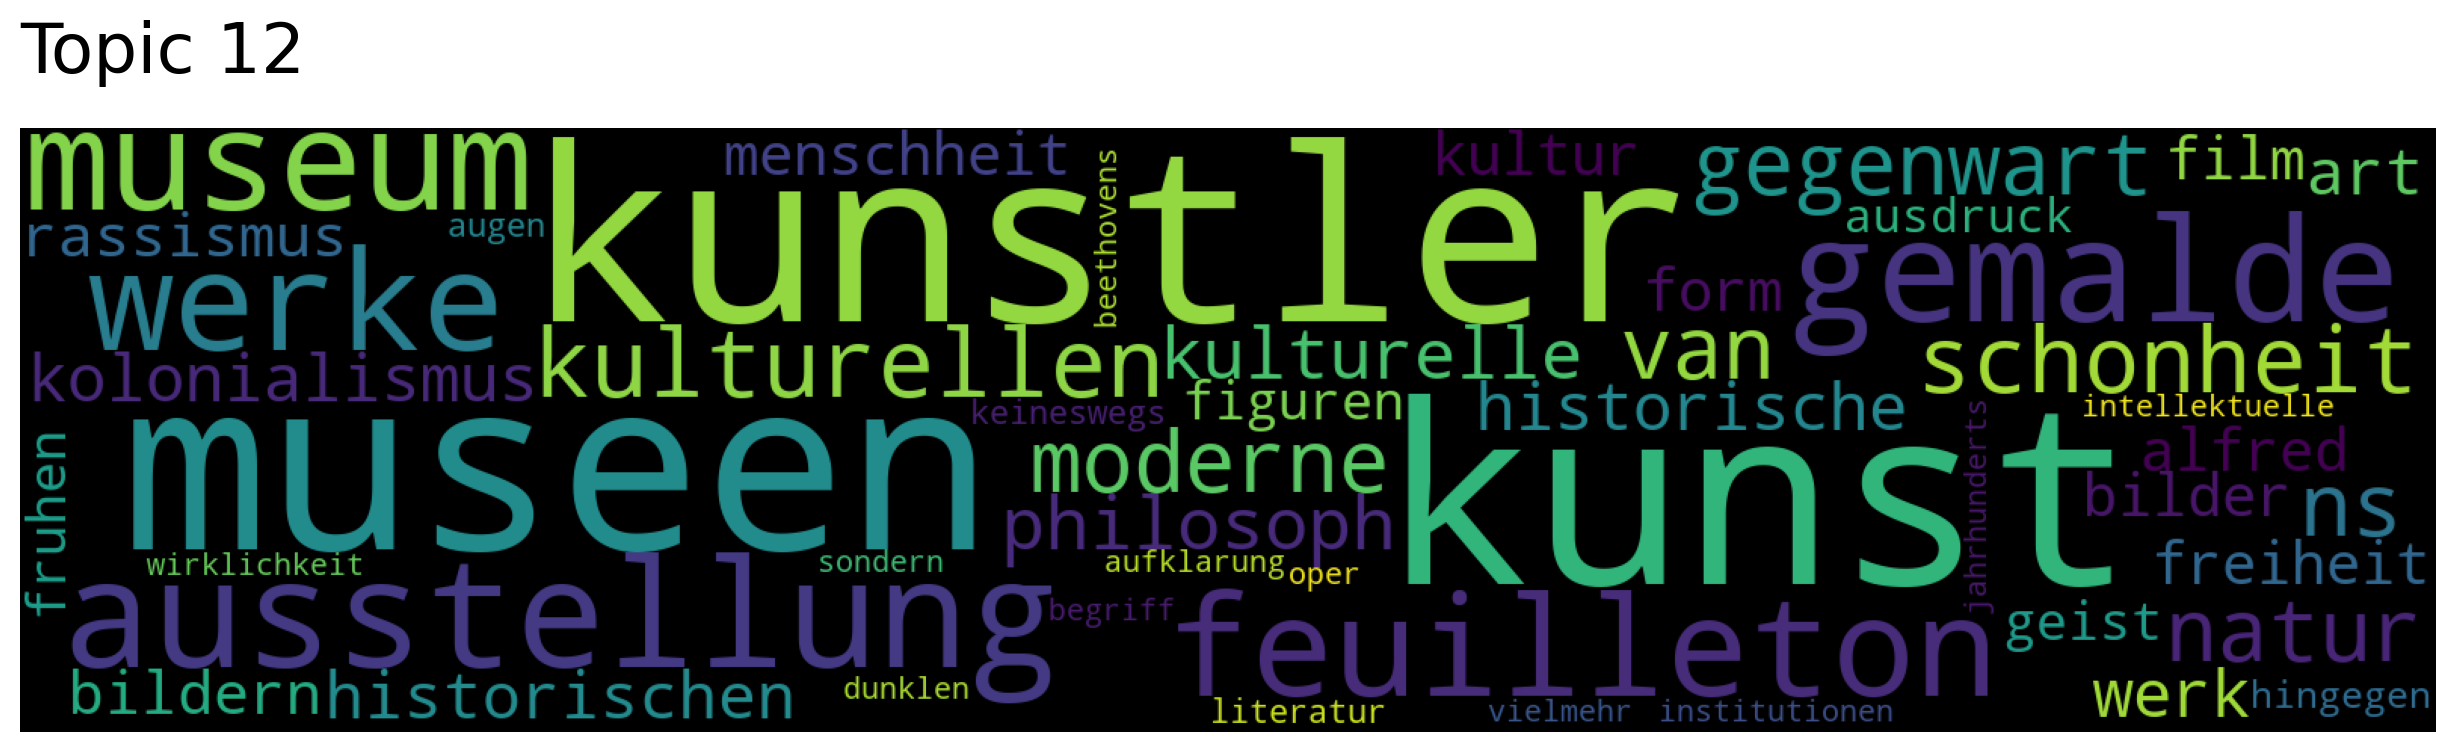

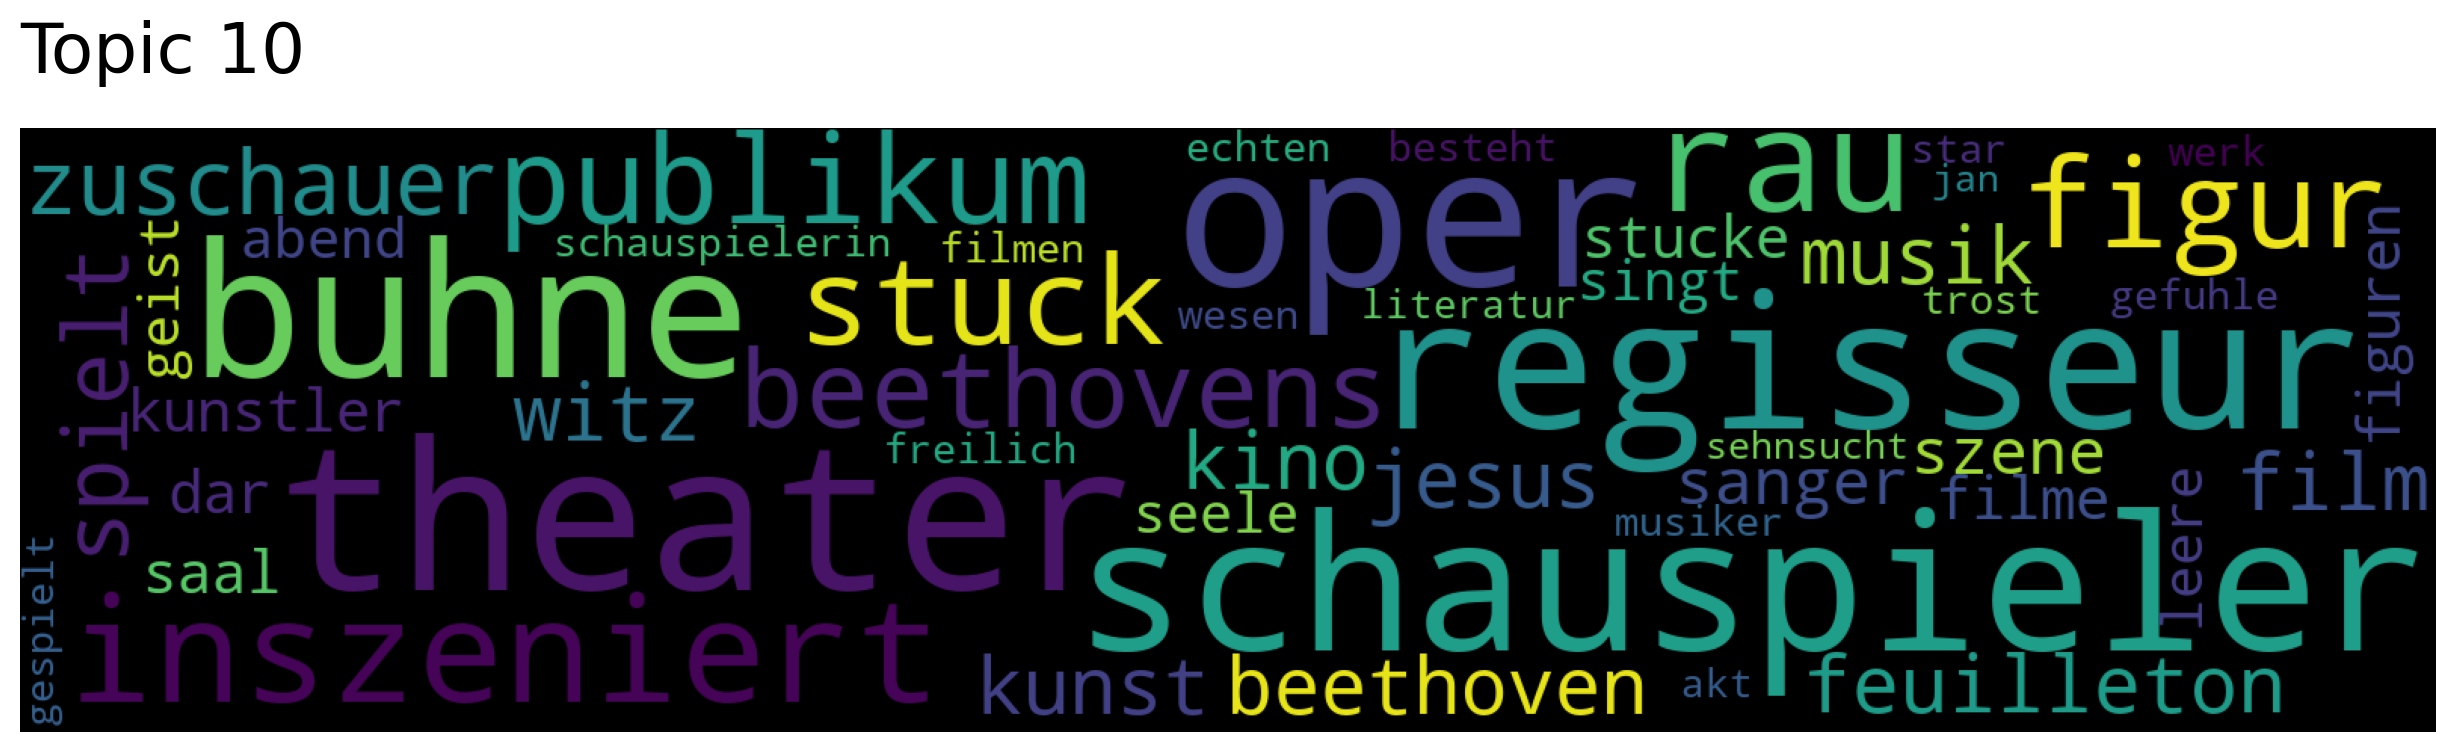

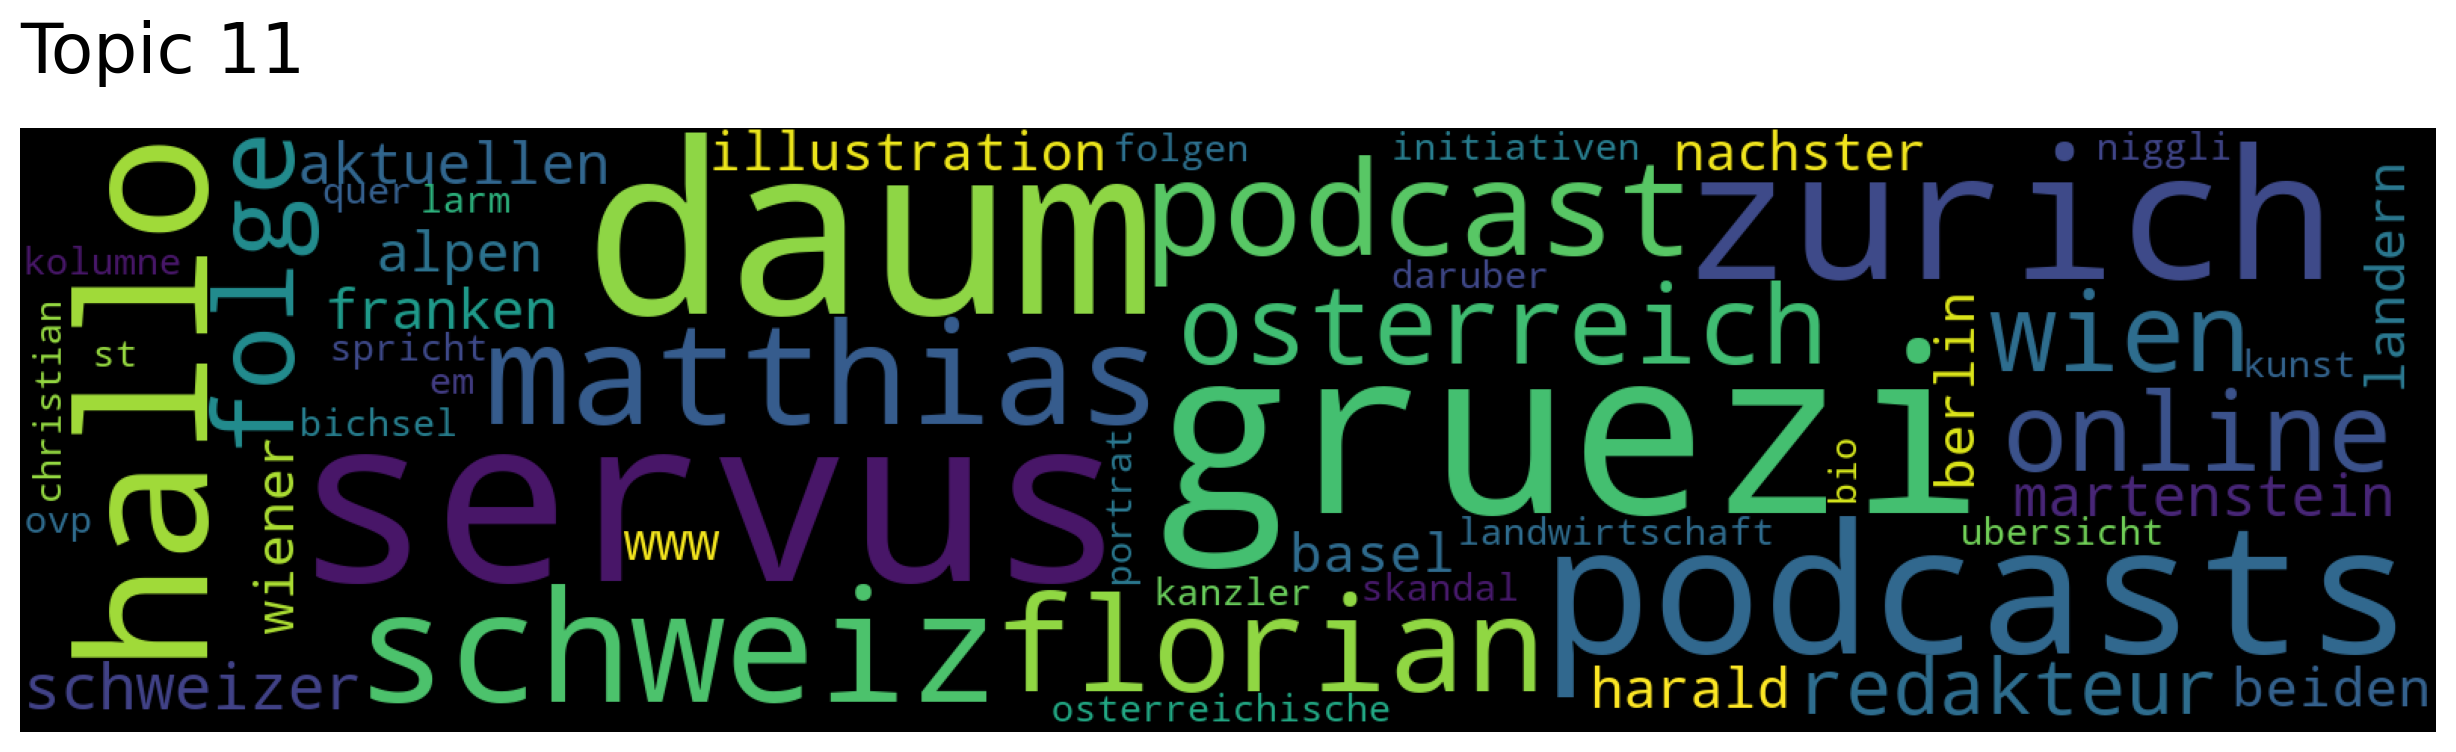

In [17]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['kultur'], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [13]:
words, word_scores = model.similar_words(keywords=["prasident"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

prasidenten 0.6045438029090947
us 0.5539221243820551
trump 0.48965694673633414
trumps 0.4540493082383825
usa 0.44961557272305147
donald 0.44945391357745423
putin 0.4096852107482989
biden 0.40332005799634363
washington 0.40286826205328596
russland 0.38916970246336235
politik 0.37960186688750575
europa 0.3726670808266995
gegen 0.3696892439721505
russische 0.36962040376082284
ukraine 0.3630356082954641
november 0.36161295703025975
des 0.3563580440121691
regierung 0.35337774112005893
nato 0.3437149760002888
amerika 0.3423303687870881


In [ ]:
words, word_scores = model.similar_words(keywords=["maßnahmen"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")